# 1. FCNN 이용하여 MINST 분류하기 

## Import modules

In [25]:
import tensorflow as tf

## 데이터 불러오기

In [26]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [27]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

## 네트워크 구조 정의

#### ㅇ FCNN 이므로 입력 데이터를 쭉 나열해야 하므로 Flatten 함수를 사용함.

In [28]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation='softmax')])

## Keras 모델 Compile

In [29]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               100480    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


## 학습 수행

In [30]:
EPOCHS = 50
BATCH_SIZE = 1024

In [31]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [32]:
es = EarlyStopping(monitor='val_loss', patience=4, mode='min', verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

In [33]:
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[es, mc], validation_data=(x_test, y_test))

Epoch 1/50
59/59 [==============================] - 1s 7ms/step - loss: 1.4035 - accuracy: 0.5761 - val_loss: 0.3543 - val_accuracy: 0.9068

Epoch 00001: val_accuracy improved from -inf to 0.90680, saving model to best_model.h5
Epoch 2/50
59/59 [==============================] - 0s 5ms/step - loss: 0.3809 - accuracy: 0.8918 - val_loss: 0.2651 - val_accuracy: 0.9274

Epoch 00002: val_accuracy improved from 0.90680 to 0.92740, saving model to best_model.h5
Epoch 3/50
59/59 [==============================] - 0s 5ms/step - loss: 0.2936 - accuracy: 0.9162 - val_loss: 0.2234 - val_accuracy: 0.9352

Epoch 00003: val_accuracy improved from 0.92740 to 0.93520, saving model to best_model.h5
Epoch 4/50
59/59 [==============================] - 0s 5ms/step - loss: 0.2470 - accuracy: 0.9292 - val_loss: 0.1956 - val_accuracy: 0.9433

Epoch 00004: val_accuracy improved from 0.93520 to 0.94330, saving model to best_model.h5
Epoch 5/50
59/59 [==============================] - 0s 5ms/step - loss: 0.2214 

## 학습 결과 테스트

In [34]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0621 - accuracy: 0.9808


[0.062069837003946304, 0.9807999730110168]

## 성능 그래프

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
x_range = range(1,len(history.history['accuracy'])+1)

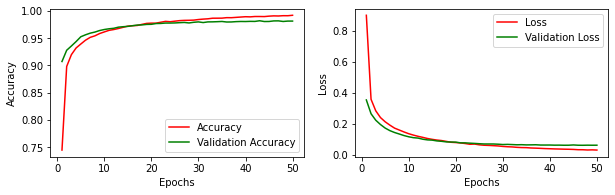

In [37]:
plt.figure(figsize=(10,6))
plt.subplot(221)
plt.plot(x_range, history.history['accuracy'], color='red', label='Accuracy')
plt.plot(x_range, history.history['val_accuracy'], color='green', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(222)
plt.plot(x_range, history.history['loss'], color='red', label='Loss')
plt.plot(x_range, history.history['val_loss'], color='green', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# 실전 테스트

In [38]:
x_test[0].shape

(28, 28)

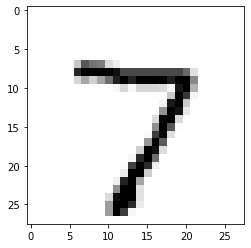

The Answer is  [7]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [39]:
n = 0
plt.imshow(x_test[n], cmap='Greys', interpolation='nearest')
plt.show()

print('The Answer is ', model.predict_classes(x_test[n].reshape(1,28,28)))

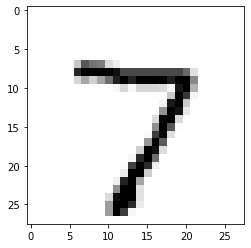

The Answer is  [[1.2665311e-08 9.6011289e-11 1.8068872e-06 1.6941548e-04 1.3956016e-12
  8.7043341e-09 5.2464160e-14 9.9982798e-01 1.2057585e-07 5.5933663e-07]]


In [40]:
n = 0
plt.imshow(x_test[n], cmap='Greys', interpolation='nearest')
plt.show()

print('The Answer is ', model.predict(x_test[n].reshape(1,28,28)))